In [1]:
#refeence from
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

#more code from
#https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer/notebook


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255)
# while y_train and y_test parts contain labels from 0 to 9 which represents which number they actually are.

7


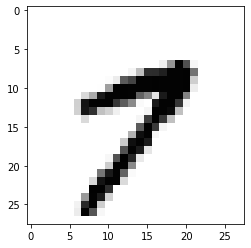

In [5]:
import matplotlib.pyplot as plt

image_index = 79 # we have up to 60,000
print(y_train[image_index]) # The label is 7
plt.imshow(x_train[image_index], cmap='Greys')  # , cmap='Greys' greyscale visualization of the RGB codes

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Normalizing Dataset Reshaping and Normalizing the Images
# To be able to use the dataset in Keras API, we need 4-dims NumPy arrays.
x_test.shape

(10000, 28, 28)

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers.

In [10]:
# We may experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we 
#have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout 
#rate, and a number of neurons in the first Dense layer to get a better result.

In [11]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(2,2), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(2,2), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
# Now it is time to set an optimizer with a given loss function that uses a metric

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 28)        140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 28)        3164      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1008)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2063 - accuracy: 0.9362
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0725 - accuracy: 0.9779
Epoch 3/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0528 - accuracy: 0.9833


In [15]:
model.save(r"C:\Users\admin\Desktop\dishwa\dmw\poster presentation\digit_recognition_dmw.h5")

In [16]:
model = keras.models.load_model(r"C:\Users\admin\Desktop\dishwa\dmw\poster presentation\digit_recognition_dmw.h5")

In [17]:
final_loss,final_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0526 - accuracy: 0.9819


In [ ]:
## testing

2


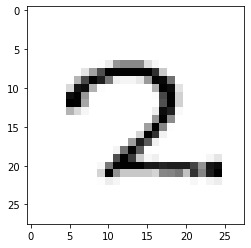

In [18]:
image_index = 77
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [19]:
# import os.
# #full path.
# dir_path = os. path. dirname(os. path. realpath(__file__))
# 
# #current dir.
# cwd = os. getcwd()
%pwd

'C:\\Users\\admin\\Downloads'

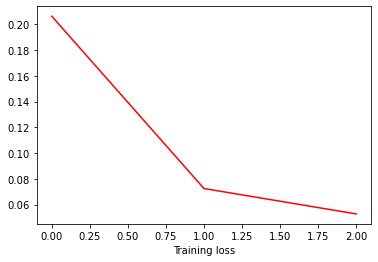

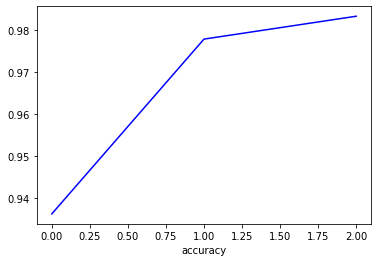

In [20]:
plt.plot(hist.history['loss'], color='r', label='Training loss')
plt.xlabel('Training loss')
#plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['accuracy'], color='b')
plt.xlabel('accuracy')
#plt.plot(hist.history['val_accuracy'], color='r')
plt.show()

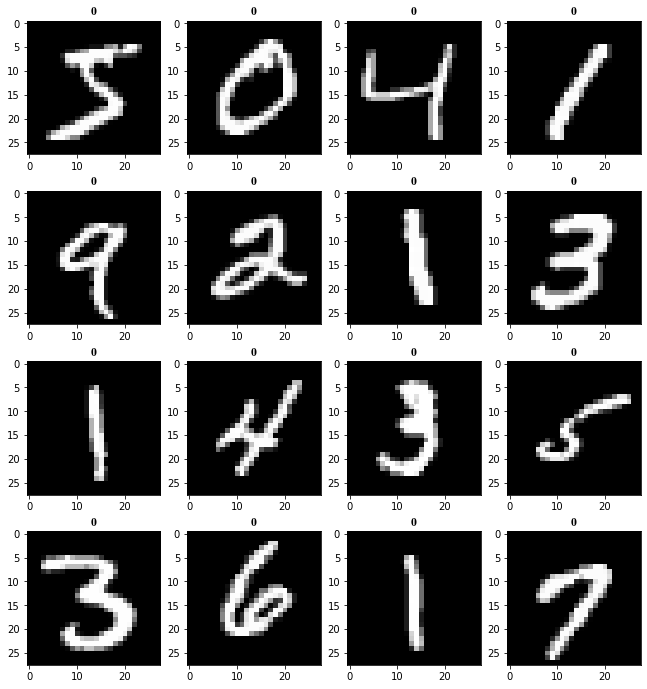

In [21]:
fig = plt.figure(figsize = (11, 12))

for i in range(16):  
    plt.subplot(4,4,1 + i)
    plt.title(np.argmax(y_train[i]),fontname="Times New Roman",fontweight="bold")
    plt.imshow(x_train[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()